In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
!pip install datasets

In [ ]:
!pip install torch transformers
# !pip install --upgrade torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import pandas as pd
import torch
import numpy as np
import warnings
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from transformers import BertModel
from transformers import AdamW, get_linear_schedule_with_warmup
import time
import os
import sys
import torch.nn as nn

from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd
from transformers import AutoTokenizer,AutoModelForSequenceClassification, DataCollatorWithPadding, AdamW
import torch
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
model_checkpoint = 'csebuetnlp/banglabert'
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels = 2)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/H/MIXMYDS.csv")
df

,Label,Text
0,depressive,কারণ আমরা একলাফে চাকরি পাওয়ার সপ্ন দেখি ছোটখাট...
1,non_depressive,"অরন্যদেব ছবিতে যে ছিল আমার কন্যা , সে আজ থেকে ..."
2,depressive,ঢাকার কষ্টের আরেক নাম ব্যাচেলর জীবন
3,non_depressive,ইয়াশ রোহানতটিনী সেরা জুটিতটিনীকে আমার অনেক ভাল...
4,depressive,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...
...,...,...
9371,depressive,সরকারের উচিত বাজার দাম নিয়ন্ত্রণে রাখা কিন্তু ...
9372,depressive,শান্ত বুকের তপ্তক্ষুনে শক্তমাটি রক্তলাল মজলুমা...
9373,depressive,উন্নয়ন শুধু সরকারের আমলাদের হয়েছেহয়েছে মন্ত্রী...
9374,depressive,ব্যাক্তিগত ইচ্ছার থেকে এখনে পরিবার আশেপাশের মা...


In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Download NLTK resources
nltk.download('punkt')
# Preprocessing function
def preprocess_text(text):
    text = re.sub('<[^<]+?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)  # Remove punctuation
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Remove single characters
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove leading and trailing spaces
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
bangla_stopwords = [
   'এই', 'সে', 'এ', 'তার', 'যে', 'আমাদের', 'তাদের', 'আমরা', 'তোমরা',
    'তুমি', 'তারা', 'যার', 'কোন', 'কিছু', 'এক', 'অনেক', 'অধিক', 'সব',
    'কত', 'কোথায়'
]

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in bangla_stopwords]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

df['Text'] = df['Text'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else x)
df['Text'] = df['Text'].apply(remove_stopwords)

df.head(20)


,Label,Text
0,depressive,কারণ একলাফে চাকরি পাওয়ার সপ্ন দেখি ছোটখাট চাকর...
1,non_depressive,অরন্যদেব ছবিতে ছিল আমার কন্যা থেকে ভূমিকন্যা
2,depressive,ঢাকার কষ্টের আরেক নাম ব্যাচেলর জীবন
3,non_depressive,ইয়াশ রোহানতটিনী সেরা জুটিতটিনীকে আমার ভালো লাগ...
4,depressive,জনগণের ভোট চুরি করে ক্ষমতায় আসা নিয়ত নাই আওয...
5,non_depressive,বেটা ডলার পাওয়ার আসায় এমন মিউজিক দিলো।
6,depressive,আমি সময় অনুমান করি আমি কারণে অসন্তুষ্ট।আমি সম...
7,non_depressive,আগে সময় আফরান নিশু মেহজাবীন নাটক দেখতাম। এখন এ...
8,depressive,আমার মাথা ব্যাথা চলতেছে তাহলে কারণেই
9,non_depressive,জুন জীবনের সবথেকে স্মরণীয় দিন


In [ ]:
df['label'] = df['Label']
# Perform label encoding for the 'Label' column
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

df

,Label,Text,label
0,0,কারণ একলাফে চাকরি পাওয়ার সপ্ন দেখি ছোটখাট চাকর...,depressive
1,1,অরন্যদেব ছবিতে ছিল আমার কন্যা থেকে ভূমিকন্যা,non_depressive
2,0,ঢাকার কষ্টের আরেক নাম ব্যাচেলর জীবন,depressive
3,1,ইয়াশ রোহানতটিনী সেরা জুটিতটিনীকে আমার ভালো লাগ...,non_depressive
4,0,জনগণের ভোট চুরি করে ক্ষমতায় আসা নিয়ত নাই আওয...,depressive
...,...,...,...
9371,0,সরকারের উচিত বাজার দাম নিয়ন্ত্রণে রাখা কিন্তু ...,depressive
9372,0,শান্ত বুকের তপ্তক্ষুনে শক্তমাটি রক্তলাল মজলুমা...,depressive
9373,0,উন্নয়ন শুধু সরকারের আমলাদের হয়েছেহয়েছে মন্ত্রী...,depressive
9374,0,ব্যাক্তিগত ইচ্ছার থেকে এখনে পরিবার আশেপাশের মা...,depressive


In [ ]:
# Tokenization function

from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
import re
import string
import nltk
nltk.download('punkt')

def tokenize_text(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    tokens = word_tokenize(text)
    return tokens

df['Tokenized_sentence'] = df['Text'].apply(lambda x: tokenize_text(x) if pd.notnull(x) else x)
df = df.dropna(subset=['Tokenized_sentence'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split

# First split: 80% training and 20% test/validation combined
train_df, test_valid_df = train_test_split(df, test_size=0.2, random_state=39)

# Second split: 50% of test/validation combined for test and validation
test_df, valid_df = train_test_split(test_valid_df, test_size=0.1, random_state=39)

print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_valid_df)}")
print(f"Validation set size: {len(valid_df)}")




Training set size: 7500
Test set size: 1876
Validation set size: 188


In [ ]:
# Save the split datasets to CSV files (optional)
train_df.to_csv("train.csv", index=False)
test_valid_df.to_csv("test.csv", index=False)
valid_df.to_csv("validation.csv", index=False)

In [ ]:
df_sentnob_train = train_df
df_sentnob_test = test_valid_df
df_sentnob_val = valid_df

In [ ]:
df_sentnob_val

,Label,Text,label,Tokenized_sentence
5114,0,আমি জীবনের হারিয়ে দিন দিন ডিপ্রেশন ডুবে যাচ্ছ...,depressive,"[আমি, জীবনের, হারিয়ে, দিন, দিন, ডিপ্রেশন, ডুব..."
6272,0,টাইপের নিউজ শুনতে শুনতে এখন অবিশ্বাস্য মনে খুব...,depressive,"[টাইপের, নিউজ, শুনতে, শুনতে, এখন, অবিশ্বাস্য, ..."
4833,1,বেশিদিন ক্ষমতায় তাহলে এভাবেই হয় বাংলাদেশ সরা...,non_depressive,"[বেশিদিন, ক্ষমতায়, তাহলে, এভাবেই, হয়, বাংলাদ..."
8735,1,আচ্চা মিনিট একসাথে হাটতে হবে নাকিকিছুক্ষণ হাটল...,non_depressive,"[আচ্চা, মিনিট, একসাথে, হাটতে, হবে, নাকিকিছুক্ষ..."
6327,1,আগে শুধু অপূর্ব মেহজাবিনের নাটক দেখতাম এখন ইয়া...,non_depressive,"[আগে, শুধু, অপূর্ব, মেহজাবিনের, নাটক, দেখতাম, ..."
...,...,...,...,...
9152,0,কোথাও নেই মানবতা কোথাও নেই বিচার সবখানেতে ঝুলে...,depressive,"[কোথাও, নেই, মানবতা, কোথাও, নেই, বিচার, সবখানে..."
2051,1,অপেক্ষা করুন বন্ধু মোদি কিছুদিনের মধ্যে বাংলাদ...,non_depressive,"[অপেক্ষা, করুন, বন্ধু, মোদি, কিছুদিনের, মধ্যে,..."
3655,1,আমি দুজন অভিনেতার নাটক দেখেছি কিন্তু শেষ কিছুদ...,non_depressive,"[আমি, দুজন, অভিনেতার, নাটক, দেখেছি, কিন্তু, শে..."
5319,1,আল্লাহ আমাকে বাচিয়েছেন আল্লাহর কাছে শুকরিয়া আদ...,non_depressive,"[আল্লাহ, আমাকে, বাচিয়েছেন, আল্লাহর, কাছে, শুকর..."


In [ ]:
df_sentnob_train = df_sentnob_train.sample(frac=1)
df_sentnob_test = df_sentnob_test.sample(frac=1)
df_sentnob_val = df_sentnob_val.sample(frac=1)

In [ ]:
import datasets
from datasets import load_dataset, DatasetDict
sentnob = DatasetDict()
sentnob["train"] = datasets.Dataset.from_pandas(df = df_sentnob_train)
sentnob["test"] = datasets.Dataset.from_pandas(df = df_sentnob_test)
sentnob['val'] = datasets.Dataset.from_pandas(df = df_sentnob_val)
sentnob

DatasetDict({
    train: Dataset({
        features: ['Label', 'Text', 'label', 'Tokenized_sentence', '__index_level_0__'],
        num_rows: 7500
    })
    test: Dataset({
        features: ['Label', 'Text', 'label', 'Tokenized_sentence', '__index_level_0__'],
        num_rows: 1876
    })
    val: Dataset({
        features: ['Label', 'Text', 'label', 'Tokenized_sentence', '__index_level_0__'],
        num_rows: 188
    })
})

In [ ]:
sentnob = sentnob.rename_column("Label","labels")
sentnob = sentnob.rename_column("Text","text")
sentnob

DatasetDict({
    train: Dataset({
        features: ['labels', 'text', 'label', 'Tokenized_sentence', '__index_level_0__'],
        num_rows: 7500
    })
    test: Dataset({
        features: ['labels', 'text', 'label', 'Tokenized_sentence', '__index_level_0__'],
        num_rows: 1876
    })
    val: Dataset({
        features: ['labels', 'text', 'label', 'Tokenized_sentence', '__index_level_0__'],
        num_rows: 188
    })
})

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding='max_length', truncation=True, max_length=512)

In [ ]:
tokenized_sentnob = sentnob.map(tokenize_function, batched=True)
tokenized_sentnob

Map:   0%|          | 0/7500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1876 [00:00<?, ? examples/s]

Map:   0%|          | 0/188 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text', 'label', 'Tokenized_sentence', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 7500
    })
    test: Dataset({
        features: ['labels', 'text', 'label', 'Tokenized_sentence', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1876
    })
    val: Dataset({
        features: ['labels', 'text', 'label', 'Tokenized_sentence', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 188
    })
})

In [ ]:
tokenized_sentnob = tokenized_sentnob.remove_columns(['text'])
tokenized_sentnob = tokenized_sentnob.remove_columns(['label'])

tokenized_sentnob = tokenized_sentnob.remove_columns(['Tokenized_sentence'])
tokenized_sentnob = tokenized_sentnob.remove_columns(['__index_level_0__'])

tokenized_sentnob

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 7500
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1876
    })
    val: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 188
    })
})

In [ ]:
tokenized_sentnob.set_format('torch')
data_collator = DataCollatorWithPadding(tokenizer)
from torch.utils.data import DataLoader


In [ ]:
train_dataloader = DataLoader(tokenized_sentnob['train'], shuffle = True, batch_size = 10, collate_fn = data_collator)
print(train_dataloader)

In [ ]:
eval_dataloader = DataLoader(tokenized_sentnob['val'], shuffle = True , batch_size = 5, collate_fn= data_collator)
eval_dataloader

In [ ]:
test_dataloader = DataLoader(tokenized_sentnob['test'], shuffle = True , batch_size = 5, collate_fn= data_collator)
test_dataloader

In [ ]:
np.object = object

In [ ]:
flag = 0
data_dict=[]
for i in train_dataloader:
    if flag > 3:
        break

    data_dict.append([{k:v.shape for k,v in i.items()}])
    flag = flag + 1

data_dict

[[{'labels': torch.Size([10]),
   'input_ids': torch.Size([10, 512]),
   'token_type_ids': torch.Size([10, 512]),
   'attention_mask': torch.Size([10, 512])}],
 [{'labels': torch.Size([10]),
   'input_ids': torch.Size([10, 512]),
   'token_type_ids': torch.Size([10, 512]),
   'attention_mask': torch.Size([10, 512])}],
 [{'labels': torch.Size([10]),
   'input_ids': torch.Size([10, 512]),
   'token_type_ids': torch.Size([10, 512]),
   'attention_mask': torch.Size([10, 512])}],
 [{'labels': torch.Size([10]),
   'input_ids': torch.Size([10, 512]),
   'token_type_ids': torch.Size([10, 512]),
   'attention_mask': torch.Size([10, 512])}]]

In [ ]:
outputs = model(**i)

In [ ]:
print(outputs.loss)
print(outputs.logits.shape)
print(outputs.logits)

tensor(0.7023, grad_fn=<NllLossBackward0>)
torch.Size([10, 2])
tensor([[ 0.0327,  0.0001],
        [ 0.0473,  0.0347],
        [-0.0045,  0.0212],
        [ 0.0321, -0.0037],
        [ 0.0487, -0.0044],
        [ 0.0412, -0.0158],
        [ 0.0523,  0.0273],
        [ 0.0419, -0.0344],
        [ 0.0964,  0.0239],
        [ 0.0635,  0.0087]], grad_fn=<AddmmBackward0>)


In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_scheduler
len(train_dataloader)

750

In [ ]:
num_epochs = 5
num_training_steps = num_epochs * len(train_dataloader)
num_training_steps

3750

In [ ]:
lr_scheduler = get_scheduler("linear", optimizer = optimizer, num_warmup_steps = 0, num_training_steps = num_training_steps)

In [ ]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device('cpu')

In [ ]:
model.to(device)
print(device)

cuda


In [ ]:
from tqdm.auto import tqdm
progress_bar = tqdm(range(num_training_steps))
model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k:v.to(device) for k,v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()


        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

  0%|          | 0/3750 [00:00<?, ?it/s]

In [ ]:
import evaluate

In [ ]:
def compute_metrics(eval_preds):
    metric = evaluate.combine(["accuracy"])
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
import evaluate

metric = evaluate.load("accuracy")
model.eval()
for batch in test_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()

{'accuracy': 0.8800639658848614}

In [ ]:
predictions = []
ground_truth_labels = []

for batch in test_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    ##print(batch)
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    batch_predictions = logits.argmax(dim=-1).tolist()
    predictions.extend(batch_predictions)
    ground_truth_labels.extend(batch['labels'].tolist())
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

accuracy = accuracy_score(ground_truth_labels, predictions)
f1_macro = f1_score(ground_truth_labels, predictions, average='macro')
f1_micro = f1_score(ground_truth_labels, predictions, average='micro')

precision = precision_score(ground_truth_labels, predictions, average="weighted")
recall = recall_score(ground_truth_labels, predictions, average="weighted")
class_report = classification_report(ground_truth_labels, predictions)
conf_matrix = confusion_matrix(ground_truth_labels, predictions)

print("Accuracy:", accuracy)
print("F1 Macro:", f1_macro)
print("F1 Micro:", f1_micro)
print('Precision:', precision)
print("Recall:", recall)
print("Classification Report:\n", class_report)
print("Confusion Matrix: \n", conf_matrix)

Accuracy: 0.8800639658848614
F1 Macro: 0.87991079087322
F1 Micro: 0.8800639658848614
Precision: 0.8801080799491287
Recall: 0.8800639658848614
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       964
           1       0.88      0.87      0.88       912

    accuracy                           0.88      1876
   macro avg       0.88      0.88      0.88      1876
weighted avg       0.88      0.88      0.88      1876

Confusion Matrix: 
 [[859 105]
 [120 792]]


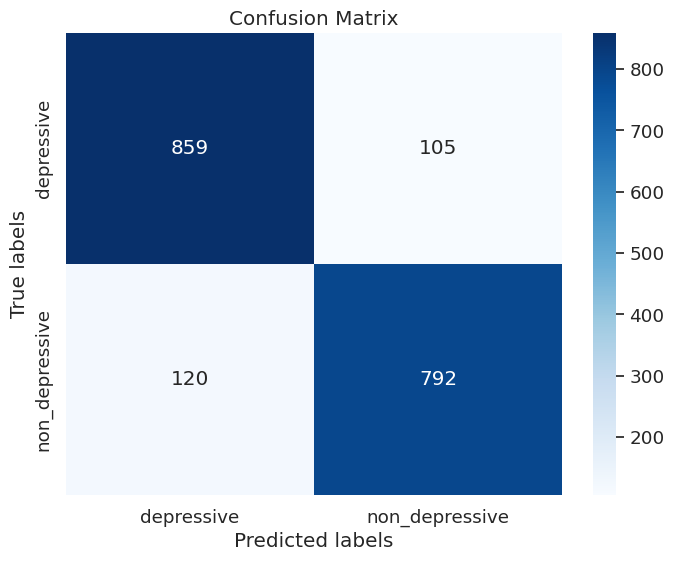

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the classes
classes = ['depressive', 'non_depressive']

# Create the confusion matrix
conf_matrix = confusion_matrix(ground_truth_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
